In [2]:
# import Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import random
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots

In [3]:
# read data
cars = pd.read_csv('UserCarData.csv')

In [4]:
# show data
cars.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [5]:
# check missing values and data type
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [6]:
# check duplicated values
cars.duplicated().sum()

0

In [7]:
# check descriptive statistics
cars.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [8]:
# check unique values
cars.describe(include='O')

,name,Region,State or Province,City,fuel,seller_type,transmission,owner,torque,sold
count,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906
unique,31,4,49,1310,4,3,2,5,441,2
top,Maruti,Central,California,New York City,Diesel,Individual,Manual,First_Owner,190Nm@ 2000rpm,N
freq,2367,2376,901,196,4299,6563,6865,5215,530,5906


In [9]:
# drop unnecessary columns
cars.drop(['mileage' , 'torque'] , axis=1 , inplace=True)

In [10]:
# change column names
cars.columns = cars.columns.str.lower().str.strip()

In [11]:
# change spaces in column names
cars.columns = cars.columns.str.replace(' ' , '_')

In [12]:
# change data type
cars['sold'] = cars['sold'].replace('N' , '0')
cars['sold'] = cars['sold'].replace('Y' , '1')
cars['sold'] = cars['sold'].astype('int64')

In [13]:
# data sample
cars.sample()

,sales_id,name,year,selling_price,km_driven,region,state_or_province,city,fuel,seller_type,transmission,owner,engine,max_power,seats,sold
152,159,Mercedes,2017,2700000,16000,East,Massachusetts,Boston,Petrol,Dealer,Automatic,First_Owner,1991,181.04,5,1


In [14]:
# check number of top 10 cars for each brand 
top_10 = cars.groupby('name')['sales_id'].count().reset_index().sort_values(by = 'sales_id' , ascending=False).head(10)

In [15]:
# plot number of top 10 cars for each brand
px.bar(top_10 , x = 'name' , y = 'sales_id', labels={'name':'Brand' , 'sales_id':'Number of cars'} 
                   , color = 'name' , title = 'Number of top 10 cars each brand'
                   , template = 'plotly_dark' , text_auto = True)

*   Maruti is the most popular car

In [16]:
# most popular year have a cars
num_of_year = cars.groupby('year')['sales_id'].count().reset_index()

In [17]:
# plot number of cars each year
px.bar(num_of_year , x = 'year' , y = 'sales_id', labels={'year':'Year' , 'sales_id':'Number of cars'} 
                   , color = 'year' , title = 'Number of cars each year'
                   , template = 'plotly_dark', text_auto = True)

* 2017 is the most year have a car

In [18]:
# max selling price
print('Max car price :',cars['selling_price'].max())

Max car price : 10000000


In [19]:
# min selling price
print('Min car price :',cars['selling_price'].min())

Min car price : 29999


In [20]:
# remove cars < 2005
cars = cars[cars['year'] >= 2005]

In [21]:
# average selling price
px.histogram(cars , 'selling_price' , template='presentation' , title='selling price',labels={'selling_price':'Selling price'})

* Avg price between 0 --> 2M

In [22]:
# max km driven
print('Max km driven :',cars['km_driven'].max(),'Km')

Max km driven : 2360457 Km


In [23]:
# min km driven
print('Min km driven :',cars['km_driven'].min(),'Km')

Min km driven : 1 Km


In [24]:
# Number of region
TopRegion = cars['region'].value_counts().reset_index().sort_values(by = 'count' , ascending=False)

In [25]:
# plot number of region
iplot(px.pie(TopRegion , values = 'count' , names = 'region' 
             , title = 'Number of region' , template = 'simple_white' , hole = 0.3 ))

* Central is the most popular region

In [26]:
#check number of top 10 state
num_of_state = cars.groupby('state_or_province')['sales_id'].count().reset_index().sort_values(by ='sales_id',ascending=False).head(10)

In [27]:
# plot number of top 10 state
iplot(px.bar(num_of_state , x = 'state_or_province' , y = 'sales_id' ,labels={'state_or_province':'State' , 'sales_id':'Number of state'}
             ,color='state_or_province', title = 'Number of top 10 state' , template = 'plotly_dark', text_auto = True))

* California is the most popular state

In [28]:
#check number of top 20 city
popular_city = cars.groupby('city')['sales_id'].count().reset_index().sort_values(by ='sales_id',ascending=False).head(10)

In [29]:
#plot number of top 20 city
iplot(px.bar(popular_city , y = 'city' , x = 'sales_id' ,labels={'city':'City' , 'sales_id':'Number of city'}
             ,color='city', title = 'popular city' , template = 'simple_white', text_auto = True))

* New York City is the most popular city

In [30]:
#most fuel used
fuel_used = cars['fuel'].value_counts().reset_index().sort_values(by = 'count' , ascending = False)

In [31]:
#plot most fuel used
iplot(px.pie(fuel_used , values = 'count' , names = 'fuel' 
             , title = 'Most fuel used', hole = 0.3 ))

* Diesel is the most fuel used

In [32]:
#most seller type
seller_type = cars.groupby('seller_type')['sales_id'].count().reset_index().sort_values(by ='sales_id',ascending=False).head(10)

In [33]:
#plot most seller type
iplot(px.pie(seller_type , values = 'sales_id' , names = 'seller_type' 
             , title = 'Most seller type', hole = 0.3 ))

* Individual is the most seller type

In [34]:
#most transmission
transmission = cars['transmission'].value_counts().reset_index().sort_values(by = 'count' , ascending = False)

In [35]:
#plot most transmission
iplot(px.pie(transmission , values = 'count' , names = 'transmission' 
             , title = 'Most transmission', hole = 0.3 ))

* Manual is the most transmission

In [36]:
#most owner
owner = cars['owner'].value_counts().reset_index().sort_values(by = 'count' , ascending = False)

In [37]:
#plot most owner
iplot(px.pie(owner , values = 'count' , names = 'owner' 
             , title = 'Most owner', hole = 0.3 ))

* First owner is the most

In [38]:
#check max engine
print('Max Engine :',cars['engine'].max())

Max Engine : 3604


In [39]:
#check min engine
print('Min Engine :',cars['engine'].min())

Min Engine : 624


In [40]:
#check max power
print('Max Power :',cars['max_power'].max())

Max Power : 400.0


In [41]:
#check min power
print('Min Power :',cars['max_power'].min())

Min Power : 32.8


In [42]:
#check most number of seats
seats = cars['seats'].value_counts().reset_index().sort_values(by = 'count' , ascending=False)

In [43]:
#plot most number of seats
iplot(px.bar(seats , x = 'seats' , y = 'count' 
                   , color = 'seats' , title = 'Most number of seats'
                   , template = 'presentation', text_auto = True , labels={'seats':'Seats'}))

* 5 seats is the most

In [44]:
#check car sold or not
sold = cars['sold'].value_counts().reset_index()

In [45]:
#plot car sold or not
iplot(px.pie(sold , values = 'count' , names = 'sold' 
             , title = '1 = sold , 0 = not sold', hole = 0.3 ))

* most car not sold

In [46]:
#check Top 10 average price per car model
avg_price = cars.groupby('name')['selling_price'].mean().sort_values(ascending=False).reset_index().head(10)

In [47]:
#plot Top 10 average price per cars
iplot(px.bar(avg_price , x = 'name' , y = 'selling_price' 
                   , color = 'name' , title = 'Top 10 average price per car model'
                   , template = 'plotly_dark', text_auto = True , labels={'name':'Brand' , 'selling_price':'Average price'}))

* Lexus is the most expensive car

In [48]:
#top 10 state
statee = cars['state_or_province'].value_counts().reset_index().head(10)['state_or_province']
#top 5 brand
namee = cars['name'].value_counts().reset_index().head(5)['name']

#check brands in each state
x = cars.groupby(['state_or_province','name'])['sales_id'].count().reset_index().sort_values(by = 'sales_id' , ascending=False)
x1 = x[x['state_or_province'].isin(statee)].reset_index()
#check top 5 name
x2 = x[x['name'].isin(namee)].reset_index()

#merge x1 and x2
x = pd.merge(x1,x2)

In [49]:
#plot brands in each state
px.bar(x , x='state_or_province',y='sales_id',color='name',barmode='group',
       title='Top brands in each state',labels={'state_or_province':'State' , 'sales_id':'Number of cars'}
,text_auto=True,template = 'plotly_dark')

* California is the state with the most cars

In [50]:
#top 10 city
ciity = cars['city'].value_counts().reset_index().head(10)['city']

#check brands in each state
y = cars.groupby(['city','name'])['sales_id'].count().reset_index().sort_values(by = 'sales_id' , ascending=False)
y1 = y[y['city'].isin(ciity)].reset_index()
#check top 5 name
y2 = y[y['name'].isin(namee)].reset_index()

#merge x1 and x2
y = pd.merge(y1,y2)

In [51]:
#plot brands in each city
px.bar(y , x='city',y='sales_id',color='name',barmode='group',
       title='Top brands in each city',labels={'state_or_province':'City' , 'sales_id':'Number of cars'}
       ,text_auto=True,template = 'simple_white')

* New York City is the city with the most cars

In [52]:
#top 10 brand
namee = cars['name'].value_counts().reset_index().head(10)['name']
#check brands used fuel
z = cars.groupby(['fuel','name'])['sales_id'].count().reset_index().sort_values(by = 'sales_id' , ascending=False)
z = z[z['name'].isin(namee)].reset_index()

In [53]:
#plot brands used fuel
px.bar(z , x='fuel',y='sales_id',color='name',barmode='group',
       title='Top brands used fuel',labels={'fuel':'Fuel' , 'sales_id':'Number of cars'}
       ,text_auto=True,template = 'simple_white')

* Most cars use petrol

In [54]:
#top 10 brand
namee = cars['name'].value_counts().reset_index().head(10)['name']
#check brands transmission
a = cars.groupby(['transmission','name'])['sales_id'].count().reset_index().sort_values(by = 'sales_id' , ascending=False)
a = a[a['name'].isin(namee)].reset_index()

In [55]:
#plot brands transmission
px.bar(a , x='transmission',y='sales_id',color='name',barmode='group',
       title='brands transmission used per car',labels={'transmission':'Transmission' , 'sales_id':'Number of cars'}
       ,text_auto=True,template = 'plotly_dark')

* Most cars is Manual

In [56]:
#top 5 brand
namee = cars['name'].value_counts().reset_index().head(5)['name']
#check brands owners
o = cars.groupby(['owner','name'])['sales_id'].count().reset_index().sort_values(by = 'sales_id' , ascending=False)
o = o[o['name'].isin(namee)].reset_index()

In [57]:
#plot brands owners
px.bar(o , x='owner',y='sales_id',color='name',barmode='group',
       title='Top brands owners',labels={'owner':'Owner' , 'sales_id':'Number of cars'}
       ,text_auto=True,template = 'plotly_dark')

* Cars first owner is the most

In [58]:
#Top 10 average engine
enginee = cars.groupby('name')['engine'].mean().reset_index().sort_values(by = 'engine' , ascending = False).head(10)

In [59]:
#plot Top 10 average engine
px.bar(enginee , y='name',x='engine',color='name',
       title='Top 10 average engine',labels={'engine':'Engine' , 'name':'Brand'}
       ,text_auto=True,template = 'plotly_dark')

* Isuzu have a max avg engine

In [60]:
#Top 10 average max power
maxx = cars.groupby('name')['max_power'].mean().reset_index().sort_values(by = 'max_power' , ascending = False).head(10)

In [61]:
#plot Top 10 average max power
px.bar(maxx , y='name',x='max_power',color='name',
       title='Top 10 average max power',labels={'max_power':'Max power' , 'name':'Brand'}
       ,text_auto=True,template = 'plotly_dark')

* Lexus have a max avg max power

In [62]:
#check average price per year
years= cars.groupby('year')['selling_price'].mean().reset_index()

In [63]:
#plot average price per year
px.line(years,x='year', y='selling_price',
              title='Average price of cars per year',
              labels={'year':'Year' , 'selling_price':'Average price'},template = 'plotly_dark')

* 2019 model cars are the most expensive

<Axes: >

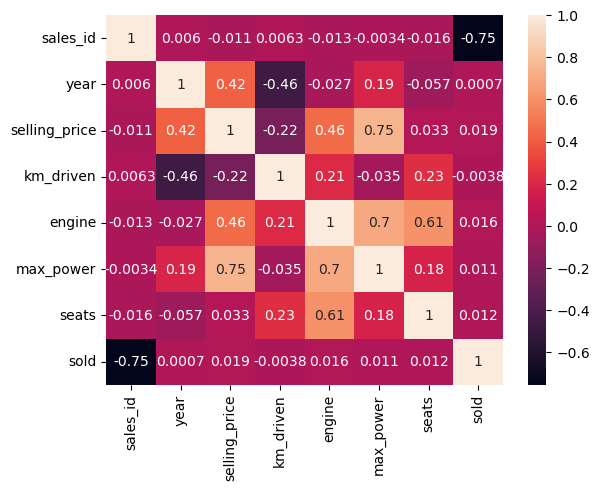

In [64]:
corr=cars.select_dtypes(exclude='object').corr()
sns.heatmap(corr,annot=True)

In [65]:
#check car sold vs not sold
cars.sold= cars.sold.apply(lambda x: 'sold' if x == 1 else 'not sold')

In [66]:
#top 10 brand
namee = cars['name'].value_counts().reset_index().head(10)['name']

#check brands sold or not
x = cars.groupby(['sold','name'])['sales_id'].count().reset_index().sort_values(by = 'sales_id' , ascending=False)

#top 10 name
soldd = x[x['name'].isin(namee)].reset_index()

In [67]:
#plot most car sold
px.bar(soldd,x='name', y='sales_id', color='sold',
              barmode='group',title='Sold vs Available Cars',
              labels={'name':'Brand' , 'sales_id':'Number of cars'},template = 'plotly_dark' , text_auto=True)

* Maruti the most sale car

In [68]:
# most car sold per year
y_s = cars.groupby(['year', 'sold'])['sales_id'].count().reset_index().sort_values(by = 'year' , ascending = True)

In [69]:
#plot most car sold per year
px.bar(y_s,x='year', y='sales_id', color='sold',
              barmode='group',title='Sold vs Available Cars per year',
              labels={'year':'Year' , 'sales_id':'Number of cars'},template = 'plotly_dark')

* 2017 is the most model year not sold

In [70]:
# cut km to categories
cars['km_driven_cat'] = pd.cut(cars['km_driven'] , bins = [0,10000,20000,30000,40000,50000,100000] , labels = ['<10k' , '10k-20k' , '20k-30k' , '30k-40k' , '40k-50k' , '50k+']) 

In [71]:
# most car sold per km
km = cars.groupby(['km_driven_cat', 'sold'])['sales_id'].count().reset_index().sort_values(by = 'km_driven_cat' , ascending = False)

C:\Users\Maydoum\AppData\Local\Temp\ipykernel_14352\2500150116.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [72]:
#plot most car sold sold per KM
px.line(km,x='km_driven_cat', y='sales_id', color='sold',
              title='Sold vs Available Cars per KM',
              labels={'km_driven_cat':'KM' , 'sales_id':'Number of cars'},template = 'plotly_dark')

* Cars with the highest KM are the least sold

In [73]:
km_price = cars.groupby('km_driven_cat')['selling_price'].mean().reset_index()

C:\Users\Maydoum\AppData\Local\Temp\ipykernel_14352\3151231945.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [74]:
px.line(km_price,x='km_driven_cat', y='selling_price',
              title='Average Price Per KM',
              labels={'km_driven_cat':'KM' , 'selling_price':'Price'},template = 'plotly_dark')

* Cars with the highest KM are the least Price

In [75]:
# cut price to categories
cars['price_cat'] = pd.cut(cars['selling_price'] , bins = [0,100000,200000,300000,400000,500000,1000000] , labels = ['<100k' , '100k-200k' , '200k-300k' , '300k-400k' , '400k-500k' , '500k+'])

In [76]:
# check most car sold per price
price = cars.groupby(['price_cat' , 'sold'])['sales_id'].count().reset_index().sort_values(by = 'price_cat' , ascending = False)

C:\Users\Maydoum\AppData\Local\Temp\ipykernel_14352\451576395.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [77]:
#plot most car sold per price
px.line(price , x = 'price_cat' , y = 'sales_id' , color='sold',
              title='Sold vs Available Cars per price',
              labels={'price_cat':'Price' , 'sales_id':'Number of cars'},template = 'simple_white')

* Cars with the price 500K+ are the least sold

In [78]:
# check most car sold per region
region = cars.groupby(['region','sold'])['sales_id'].count().reset_index()

In [79]:
# plot most car sold per region
px.bar(region , x = 'region' , y = 'sales_id' , color='sold',
              title='Sold vs Available Cars per Region',
              labels={'region':'Region' , 'sales_id':'Number of cars'},template = 'simple_white' , barmode='group')

* East most region sold cars

In [80]:
# check most car sold per top state
statee = cars['state_or_province'].value_counts().reset_index().head(10)['state_or_province']
state = cars.groupby(['state_or_province','sold'])['sales_id'].count().reset_index()
s = state[state['state_or_province'].isin(statee)].reset_index()

In [81]:
# plot most car sold per state
px.bar(s , x = 'state_or_province' , y = 'sales_id' , color='sold',
              title='Sold vs Available Cars per State',
              labels={'state_or_province':'State' , 'sales_id':'Number of cars'},template = 'plotly_dark' , barmode='group')

* California most state not sold cars 
* New York most state sold cars

In [82]:
# check most car sold per fuel
fuel = cars.groupby(['fuel' , 'sold'])['sales_id'].count().reset_index()

In [83]:
#plot most car sold per fuel type
px.bar(data_frame=fuel , x='fuel' , y='sales_id' , color='sold' ,
              title='Sold vs Available Cars per fuel type',
              labels={'fuel':'Fuel Type' , 'sales_id':'Number of cars'},template = 'simple_white' , barmode='group')

* cars use Diesel is the most common sales

In [84]:
# check most car soldper seller type
st = cars.groupby(['seller_type' , 'sold'])['sales_id'].count().reset_index()

In [85]:
#plot most car sold seller type
px.bar(data_frame=st , x='seller_type' , y='sales_id' , color='sold' ,
              title='Sold vs Available Cars per seller type',
              labels={'seller_type':'Seller Type' , 'sales_id':'Number of cars'},template = 'simple_white' , barmode='group')

* cars sold individual is the most common sales

In [86]:
# check most car sold per transmission
transmission = cars.groupby(['transmission' , 'sold'])['sales_id'].count().reset_index()

In [87]:
#plot most car soldtransmission
px.bar(data_frame=transmission , x='transmission' , y='sales_id' , color='sold' ,
              title='Sold vs Available Cars per transmission',
              labels={'transmission':'Transmission' , 'sales_id':'Number of cars'},template = 'simple_white' , barmode='group')

* Manual car sold more than Automatic

In [88]:
# check most car sold per owner
owner = cars.groupby(['owner' , 'sold'])['sales_id'].count().reset_index()

In [89]:
#plot most car sold per owner
px.bar(data_frame=owner , x='owner' , y='sales_id' , color='sold' ,
              title='Sold vs Available Cars per owner',
              labels={'owner':'Owner' , 'sales_id':'Number of cars'},template = 'simple_white' , barmode='group')

* cars has one owner is the most sold

In [90]:
# cut engine to categories
cars['engine_cat'] = pd.cut(cars['engine'] , bins = [0,1000,2000,3000,4000] , labels = ['<1000' , '1000-2000' , '2000-3000' , '3000-4000'])

In [91]:
# most car sold per engine
engine = cars.groupby(['engine_cat','sold'])['sales_id'].count().reset_index()

C:\Users\Maydoum\AppData\Local\Temp\ipykernel_14352\93839464.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [92]:
#plot 
px.bar(engine,x='engine_cat', y='sales_id', color='sold',
              title='Sold vs Available Cars engine',
              labels={'engine_cat':'Engine' , 'sales_id':'Number of cars'},template = 'simple_white',barmode='group')

* cars have engine between 1000-2000 usually not sold

In [93]:
# cut max power to categories
cars['max_power_cat'] = pd.cut(cars['max_power'] , bins = [0,50,100,150,200,250,300,350,400] , labels = ['<50' , '50-100' , '100-150' , '150-200' , '200-250' , '250-300' , '300-350' , '350-400'])

In [94]:
# most car sold per max power
max_power = cars.groupby(['max_power_cat','sold'])['sales_id'].count().reset_index()

C:\Users\Maydoum\AppData\Local\Temp\ipykernel_14352\2225390376.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [95]:
#plot
px.bar(max_power,x='max_power_cat', y='sales_id', color='sold',
              title='Sold vs Available Cars max power',
              labels={'max_power_cat':'Max Power' , 'sales_id':'Number of cars'},template = 'simple_white',barmode='group')

* cars have max power between 50-100 usually not sold

In [96]:
# check most car sold per seats
seats = cars.groupby(['seats','sold'])['sales_id'].count().reset_index()

In [97]:
#plot plot
px.bar(seats,x='seats', y='sales_id', color='sold',
              title='Sold vs Available Cars seats',
              labels={'seats':'Seats' , 'sables_id':'Number of cars'},template = 'simple_white',barmode='group')

* cars with a 5 seats is the most common sales